In [10]:
import pandas as pd
# import pandas_profiling
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns      
import statsmodels.api as sm 

In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.Series(boston.target,name='MEDV')
X.head()

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
# df['y'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          6.72e-135
Time:                        14:20:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking Model Assumptions
### Linearity of Model

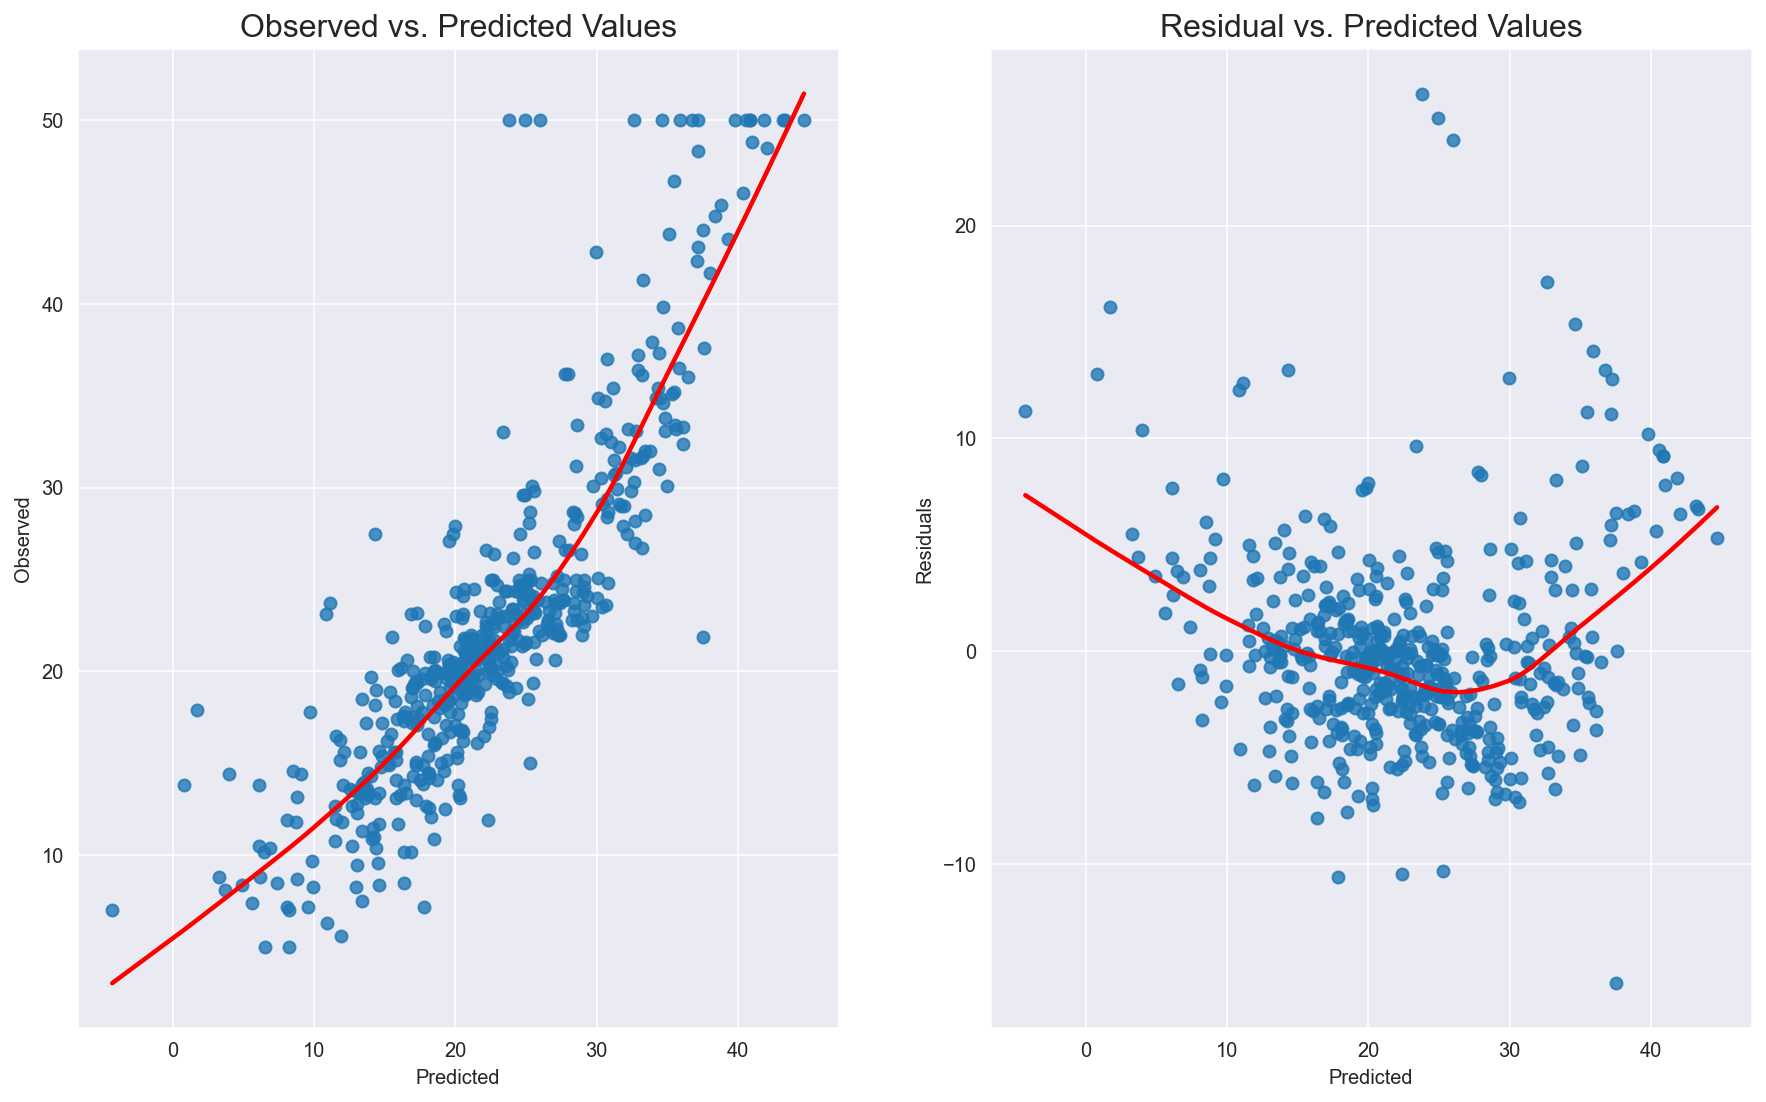

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0,9.0)

def linearity_test(model,y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    It plots observed vs. predicted and residual vs. predicted values.

    Args:
    model - fitted OLS model from statsmodel
    y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig,ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=y, lowess=True,ax=ax[0], line_kws={'color':
    'red'} )
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel = 'Observed')

    sns.regplot(x=fitted_vals,y=resids, lowess=True, ax=ax[1], line_kws={'color':'red'})
    ax[1].set_title('Residual vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
linearity_test(lin_reg,y)

In [25]:
# Mean residuals should be zero
lin_reg.resid.mean()

-3.492331588607449e-14

### Check for Multi-Collinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]}, index=X.columns)

,vif
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496
TAX,9.008554


## Homoscedasticity (equal variance) of residuals
### Potential Solutions
1. Log transformation of dependent variable 
2. Using ARCH (auto-regressive conditional heteroscedasticity) models to model the error variance

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

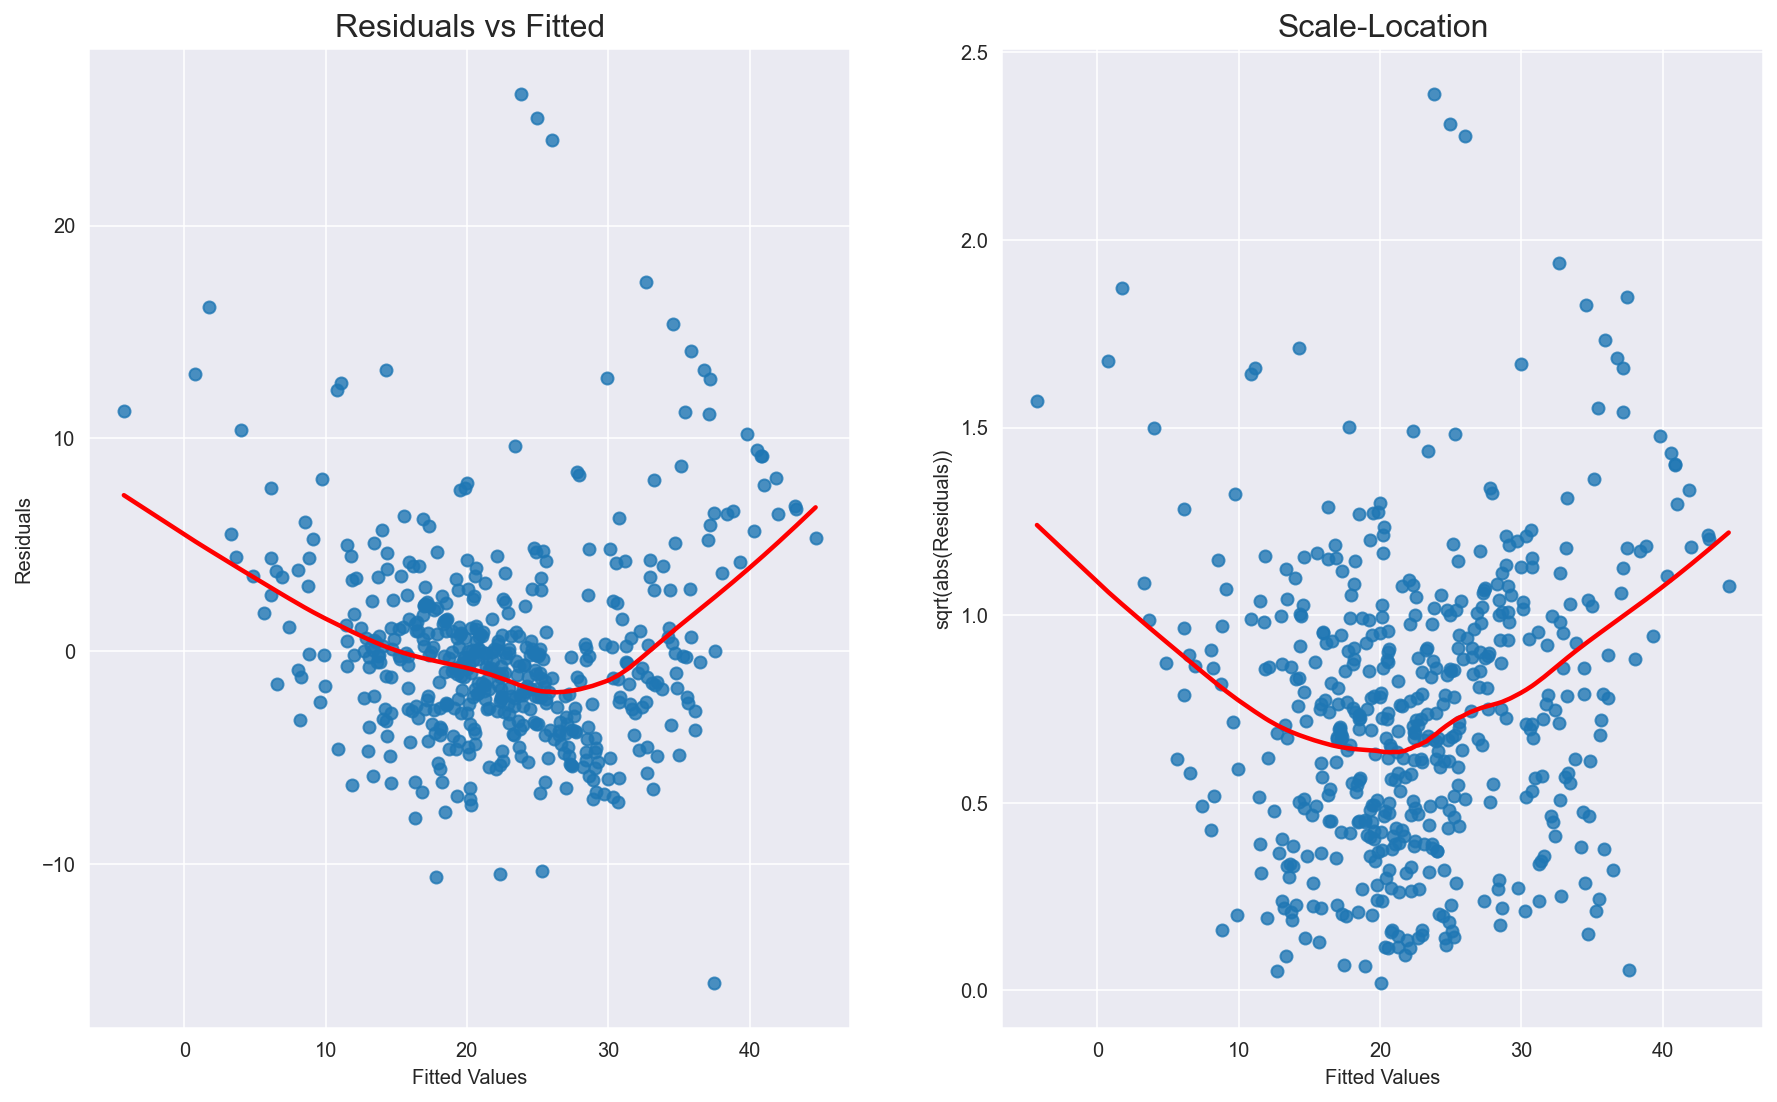

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0,9.0)


fitted_vals = lin_reg.predict()
resids = lin_reg.resid
resids_standardized = lin_reg.get_influence().resid_studentized_internal

fig,ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True,ax=ax[0], line_kws={'color':
'red'} )
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel = 'Residuals')

sns.regplot(x=fitted_vals,y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color':'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')


### No Autocorrelation of Residuals
#### To investigate if autocorrelation is present use ACF plots and Durbin-Watson Test

Some notes on Durbin-Watson Test
1. The test statistics has value between 0 and 4
2. The value of 2 means that there is no autocorrelation in the sample
3. values less than 2 indicate positive autocorrelation, values greater than 2 negative one

C:\Users\USER\AppData\Local\Temp/ipykernel_16512/1419969324.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


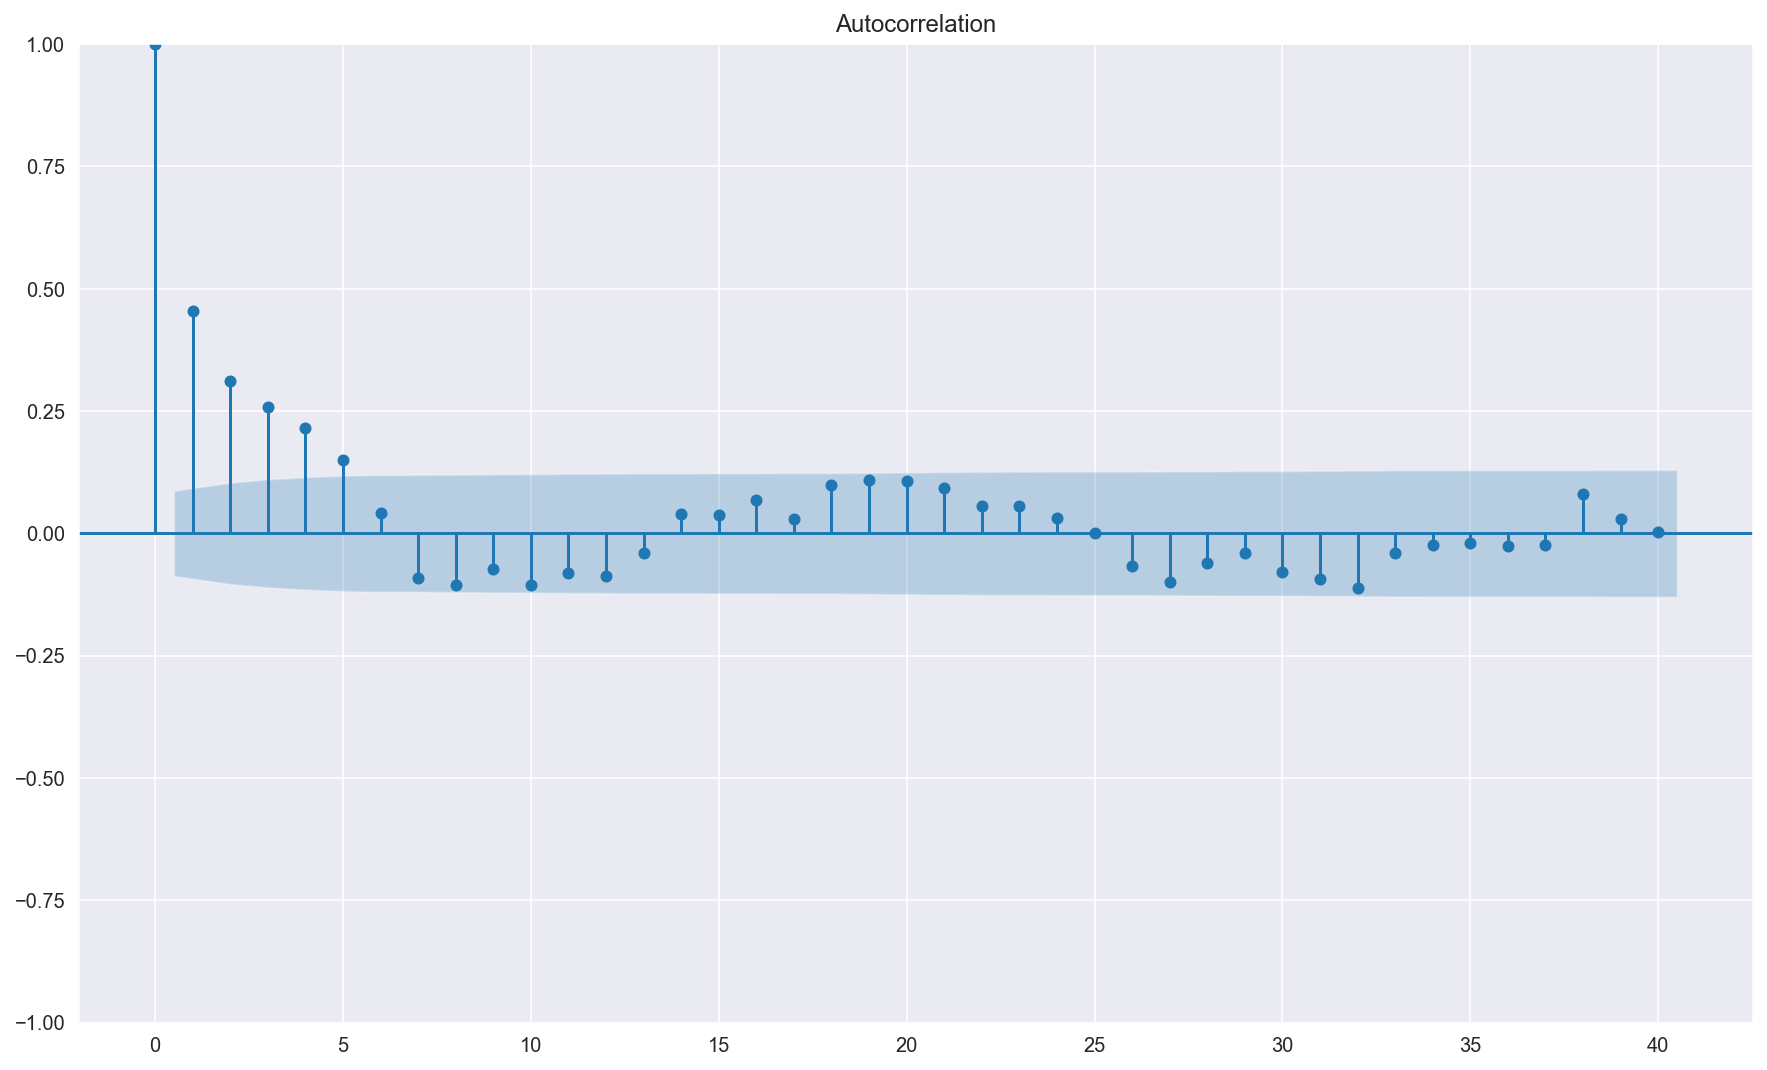

In [28]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40, alpha=0.05)
acf.show()

In [29]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lin_reg.resid, axis=0)

1.0783751186797246

## Normality of Residuals


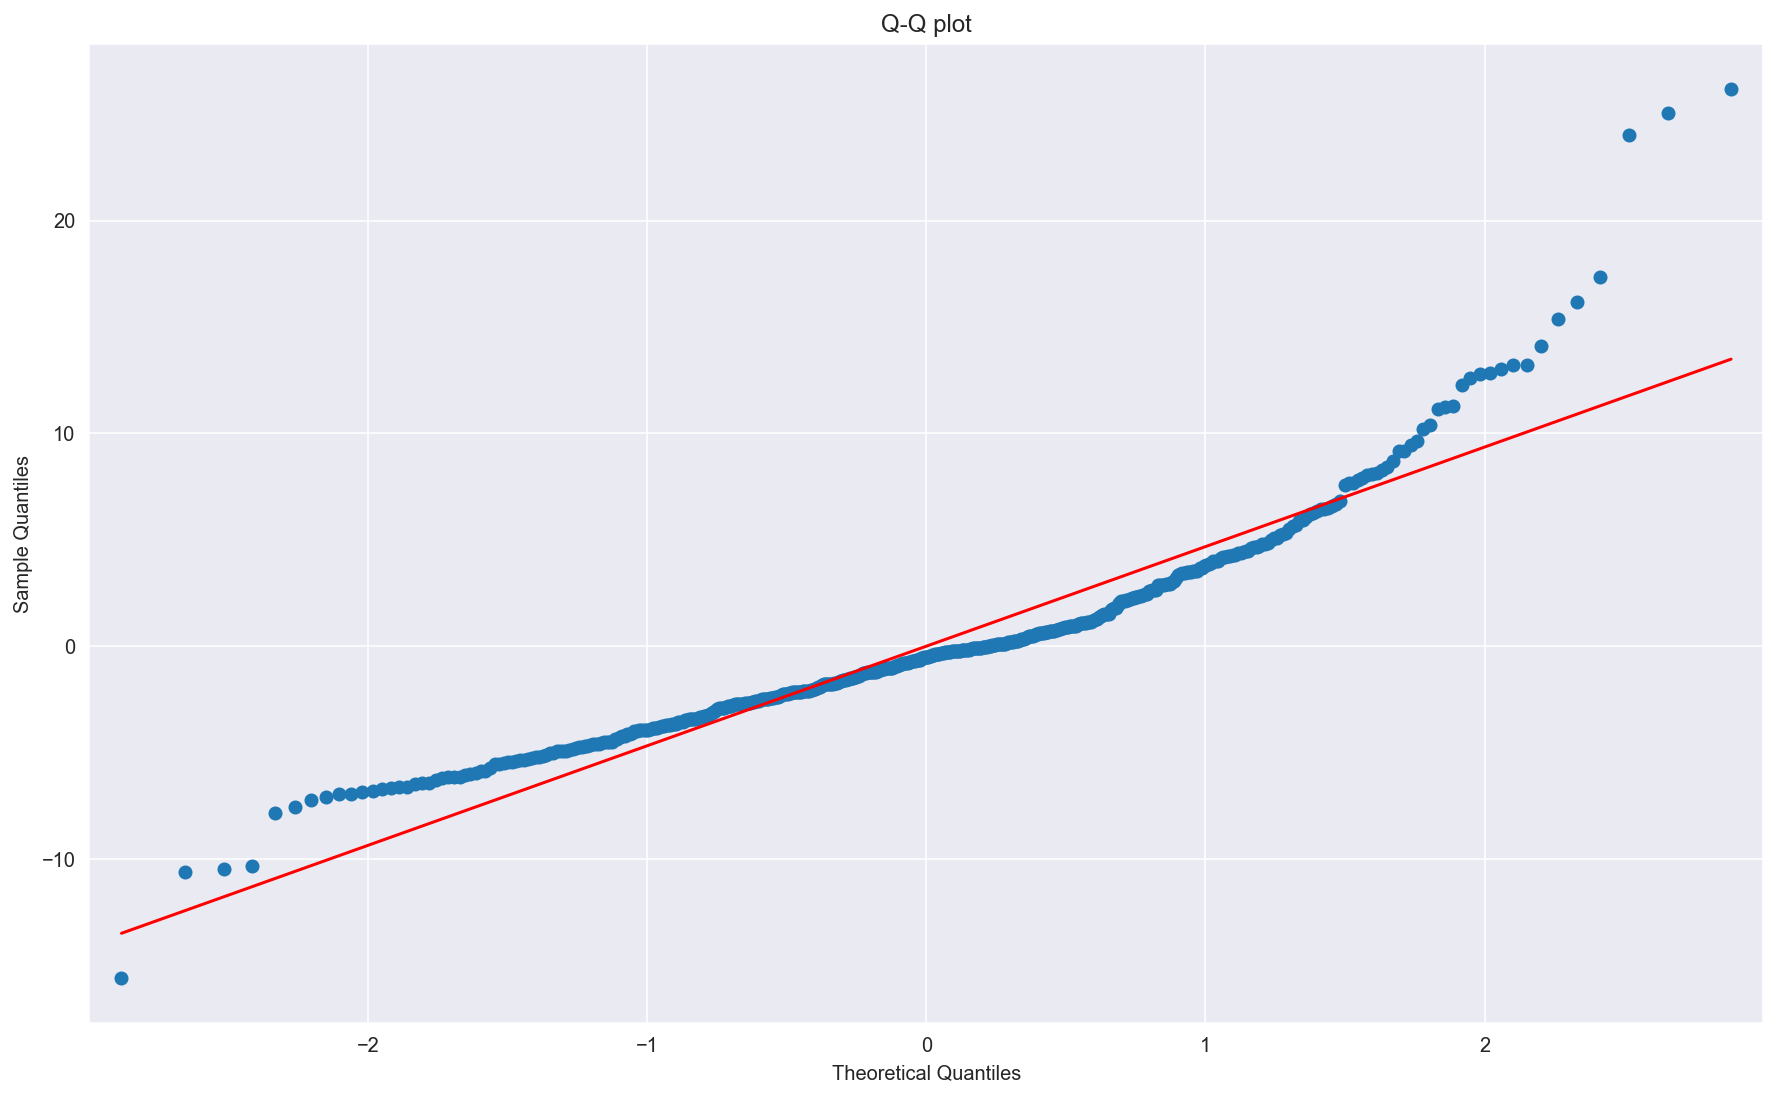

In [30]:
sm.ProbPlot(lin_reg.resid).qqplot(line='s')
plt.title('Q-Q plot');

In [33]:
from scipy import stats
jb = stats.jarque_bera(lin_reg.resid)
sw = stats.shapiro(lin_reg.resid)
ad = stats.anderson(lin_reg.resid,dist='norm')

print(f'Jarque-Bera test ----- statistics: {jb[0]:.4f}, p-value: {jb[1]}')
print(f'Shapira-Wilk test ----- statistics: {sw[0]:.4f}, p-value: {sw[1]}')
print(f'Anderson-Darling test ----- statistics: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')


Jarque-Bera test ----- statistics: 783.1263, p-value: 0.0
Shapira-Wilk test ----- statistics: 0.9014, p-value: 1.480177833053824e-17
Anderson-Darling test ----- statistics: 10.5207, 5% critical value: 0.7810


## Predict on new dataset

In [34]:
Xnew = sm.add_constant(X)
ypred = lin_reg.predict(Xnew)
print(ypred[:25])

0     30.003843
1     25.025562
2     30.567597
3     28.607036
4     27.943524
5     25.256284
6     23.001808
7     19.535988
8     11.523637
9     18.920262
10    18.999497
11    21.586796
12    20.906522
13    19.552903
14    19.283482
15    19.297483
16    20.527510
17    16.911401
18    16.178011
19    18.406136
20    12.523858
21    17.671037
22    15.832881
23    13.806285
24    15.678338
dtype: float64
